<a href="https://colab.research.google.com/github/gmihaila/gtc2020_instructor_training/blob/master/sentiment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Sanity Check

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4 or P100.

https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=scfLT2i0MLyD

In [1]:
## VERSION CHECK [FACTORY RESET UNTIL GET AT LEAST 16280MiB GPU ]
!nvidia-smi
!nvcc -V
!python -V; pip -V

Tue Feb 11 03:33:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Installs

**Set up script installs**

1. Install most recent Miniconda release compatible with Google Colab's Python install  (3.6.7)
1. removes incompatible files
1. Install RAPIDS libraries
1. Set necessary environment variables
1. Copy RAPIDS .so files into current working directory, a workaround for conda/colab interactions
1. Recommend select v0.10
If running v0.11 or higher, updates pyarrow library to 0.15.x.

In [2]:
!pip install git+https://github.com/arvkevi/kneed
!pip install git+https://github.com/UKPLab/sentence-transformers
!pip install -U ipykernel

# Install RAPIDS
!rm rapids-colab.sh
!wget -nc https://raw.githubusercontent.com/rapidsai/notebooks-contrib/890b04ed8687da6e3a100c81f449ff6f7b559956/utils/rapids-colab.sh
!bash rapids-colab.sh

import sys, os

dist_package_index = sys.path.index("/usr/local/lib/python3.6/dist-packages")
sys.path = sys.path[:dist_package_index] + ["/usr/local/lib/python3.6/site-packages"] + sys.path[dist_package_index:]
sys.path
if os.path.exists('update_pyarrow.py'): ## This file only exists if you're using RAPIDS version 0.11 or higher
  exec(open("update_pyarrow.py").read(), globals())

!pip install -U ipykernel

  Cloning https://github.com/arvkevi/kneed to /tmp/pip-req-build-p9nzwwiw
  Running command git clone -q https://github.com/arvkevi/kneed /tmp/pip-req-build-p9nzwwiw
     |████████████████████████████████| 13.1 MB 3.3 MB/s 
     |████████████████████████████████| 7.0 MB 45.9 MB/s 
     |████████████████████████████████| 26.1 MB 13 kB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 90 kB 12.3 MB/s 
     |████████████████████████████████| 294 kB 84.8 MB/s 
  Created wheel for kneed: filename=kneed-0.5.1-py2.py3-none-any.whl size=10036 sha256=8d054861d0a04b53beb594f2b850f65d02319e804337aafa4b5785adf7571f8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-e2h_iwy_/wheels/34/1e/5b/8fccab4811880902601d6770c8af716cde606d78a033ac84fb
Successfully built kneed


  Cloning https://github.com/UKPLab/sentence-transformers to /tmp/pip-req-build-jdu8_nca
  Running command git clone -q https://github.com/UKPLab/sentence-transformers /tmp/pip-req-build-jdu8_nca
  Using cached transformers-2.3.0-py3-none-any.whl (447 kB)
     |████████████████████████████████| 59 kB 2.3 MB/s 
     |████████████████████████████████| 753.4 MB 21 kB/s 
     |████████████████████████████████| 1.5 MB 47.3 MB/s 
     |████████████████████████████████| 128 kB 59.6 MB/s 
     |████████████████████████████████| 689 kB 49.9 MB/s 
Processing /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422/sacremoses-0.0.38-cp36-none-any.whl
  Using cached sentencepiece-0.1.85-cp36-cp36m-manylinux1_x86_64.whl (1.0 MB)
     |████████████████████████████████| 69 kB 8.6 MB/s 
     |████████████████████████████████| 5.9 MB 48.0 MB/s 
     |████████████████████████████████| 81 kB 10.8 MB/s 
     |████████████████████████████████| 547 kB 59.8 MB/s 
  Created wheel fo

# Downloads

In [3]:
!wget https://github.com/gmihaila/gtc2020_instructor_training/raw/master/imdb_reviews_all_labeled.csv

--2020-02-11 03:38:31--  https://github.com/gmihaila/gtc2020_instructor_training/raw/master/imdb_reviews_all_labeled.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gmihaila/gtc2020_instructor_training/master/imdb_reviews_all_labeled.csv [following]
--2020-02-11 03:38:31--  https://raw.githubusercontent.com/gmihaila/gtc2020_instructor_training/master/imdb_reviews_all_labeled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862311 (63M) [text/plain]
Saving to: ‘imdb_reviews_all_labeled.csv.2’

imdb_reviews_all_la 100%[===================>]  62.81M  80.9MB/s    in 0.8s    

2020-02-11 03:38:33

# Imports

In [166]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import torch
## Load TF 2.0
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import numpy as np
from multiprocessing import Process, Pipe
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
import pandas as pd
from multiprocessing import Process, Pipe
from sentence_transformers import SentenceTransformer
import cudf
from cuml import NearestNeighbors, KMeans, TSNE, TruncatedSVD, UMAP
from cuml import PCA as cuPCA
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import pandas as pd

pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

os.environ['NUMBAPRO_NVVM']='/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so'  
os.environ['NUMBAPRO_LIBDEVICE']='/usr/local/cuda-10.0/nvvm/libdevice'

ID_SENTIMENT = {0:'Negative',
                1:'Positive'}

PRETRAINED_MODEL = 'bert-base-nli-stsb-mean-tokens'

TensorFlow is already loaded. Please restart the runtime to change versions.


# Functions

In [0]:
def context_embedding(text, name_of_model, batch_size=1000, use_device="cuda"):

  embed_model = SentenceTransformer(model_name_or_path=name_of_model,
                                    device=torch.device(use_device))

  encodings_text = embed_model.encode(sentences=text, 
                                          batch_size=batch_size, 
                                          show_progress_bar=True)
  # empty GPU cache
  torch.cuda.empty_cache()
  return  encodings_text


def best_kmeans_elbow(features, n_clusters, verbose=False, show=False):
  features = cudf.DataFrame.from_gpu_matrix(features)
  # features = np.array(features)
  
  clusters = list(range(2, n_clusters))
  distortions = []

  for n_clusters in clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    kmean_model = KMeans(n_clusters=n_clusters)
    kmean_model.fit(features)
    
    distortion = kmean_model.inertia_
    distortions.append(distortion)

    if verbose: print("For n_clusters =", n_clusters, "Distortion is :", distortion)

  kn = KneeLocator(clusters, distortions, curve='convex', direction='decreasing')
  best_k = int(kn.knee)

  sns.set_style("whitegrid")
  plot = sns.lineplot(clusters, 
                      distortions,
                      color="coral", 
                      label="Distortions")
  plot.set(xlabel='k', ylabel='Distortions')
  plot.set_title('Using Elbow method for best k')
  plot.axvline(x=best_k)
  if show: plt.show()
  fig = plot.get_figure()
  fig.savefig("elbow_distortions.png")
  return



def best_kmeans_silhouette(features, n_clusters):
  features = np.array(features)
  
  clusters = list(range(2, n_clusters))
  silhouettes = []

  for n_clusters in clusters:
    
    # Initialize the clusterer with n_clusters value and a random generator
    kmean_model = KMeans(n_clusters=n_clusters)
    kmean_model.fit(np.array(features))

    cluster_labels = kmean_model.predict(features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouettes.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

  best_k = clusters[silhouettes.index(max(silhouettes))]

  sns.set_style("whitegrid")
  plot = sns.lineplot(clusters, 
                      silhouettes,
                      color="coral", 
                      label="Silhouette Average Score")
  plot.set(xlabel='k', ylabel='Silhouette Average Score')
  plot.set_title('Silhouette Average Score for each cluster k')
  plot.axvline(x=best_k)
  fig = plot.get_figure()
  fig.savefig("silhouette_avg.png")
  return


def kmeans(k, features):
  features = cudf.DataFrame.from_gpu_matrix(features)
  kmean_model = KMeans(n_clusters=k)
  kmean_model.fit(features)
  labels = kmean_model.labels_
  return labels



def pca_reduction(features, labels_values, n_components, random_state=20, 
                  label_decoder=None, title='PCA Plot'):
  # move to GPU matrix
  features = cudf.DataFrame.from_gpu_matrix(features)
  pca_cuml = cuPCA(n_components=n_components,
                   random_state=random_state)
  # pca_cuml.fit(features)
  # reduced_features = pca_cuml.transform(gdf_float)
  reduced_features = pca_cuml.fit_transform(features)

  # plot
  if (n_components==2) and (labels_values is not None):
    # create data frame
    reduced_features_df = pd.DataFrame()
    reduced_features_df['x'] = [float(value) for value in reduced_features.values[:,0]]
    reduced_features_df['y'] = [float(value) for value in reduced_features.values[:,1]]
    if label_decoder is not None:
      reduced_features_df['clusters'] = [label_decoder[int(value)] for value in labels_values]
    else:
      reduced_features_df['clusters'] = [int(value) for value in labels_values]
    #plot data with seaborn
    cluster_plot = sns.lmplot(data=reduced_features_df, x='x', y='y', hue='clusters', fit_reg=False, legend=True, legend_out=True)
    plt.title(title)
    plt.show()
    cluster_plot.savefig("pca_plot.png")
  return reduced_features.values


def predictions_overlap(model_predicitons, true_predicitons):
  labels = list(set(model_predicitons))
  print("Found labels: %s\n" % labels)
  ## dicitonary with predicitons counts clusters
  predictions = {label:[] for label in labels}
  for true_label, pred_label in zip(true_predicitons, model_predicitons):
    predictions[pred_label].append(true_label)
  # data frame
  matching_df = pd.DataFrame()
  matching_df['labels'] = labels
  matching_df['cluster_match'] = [" ".join([str(cluster)+":"+str(count) for cluster, count in Counter(predictions[label]).most_common()]) for label in labels]
  return matching_df


def show_samples(target_predicitons_class, texts, predicitons, trues, trues_id_sentiment,
                 predictions_id_sentiment, n_samples):
  samples_texts = []
  samples_labels = []

  while len(samples_texts) < n_samples:
    pick = np.random.randint(low=0, high=(len(trues)-1))
    if predicitons[pick] == target_predicitons_class:
      samples_texts.append(texts[pick])
      samples_labels.append(trues[pick])

  samples_df = pd.DataFrame()
  samples_df['Text'] = samples_texts
  samples_df['Label Sentiment'] = [trues_id_sentiment[label] for label in samples_labels]
  samples_df['Prediction Sentiment'] = [predictions_id_sentiment[target_predicitons_class] for _ in samples_labels]
  return samples_df

# Dataset

In [6]:
movies_sentiments_df = pd.read_csv('imdb_reviews_all_labeled.csv')

movies_reviews = movies_sentiments_df['reviews'].values
sentiments_reviews = movies_sentiments_df['sentiments'].values

print(movies_reviews[:2])
print(sentiments_reviews[:2])
print(len(sentiments_reviews))

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

# Embeddings

In [7]:
movies_reviews_embeddings = context_embedding(text=movies_reviews, name_of_model=PRETRAINED_MODEL, batch_size=500, use_device="cuda")

Batches: 100%|██████████| 100/100 [12:04<00:00, 12.93s/it]


# Best k-means

In [0]:
max_n_cluster = 10

## Elbow Method

For n_clusters = 2 Distortion is : 4172855.0
For n_clusters = 3 Distortion is : 4053102.5
For n_clusters = 4 Distortion is : 3978636.5
For n_clusters = 5 Distortion is : 3931937.5
For n_clusters = 6 Distortion is : 3888716.0
For n_clusters = 7 Distortion is : 3856695.5
For n_clusters = 8 Distortion is : 3831170.75
For n_clusters = 9 Distortion is : 3805349.0


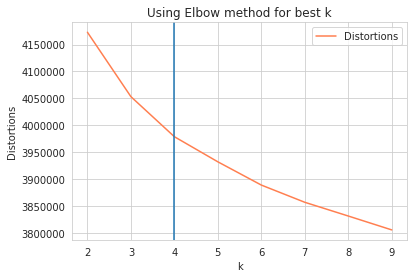

In [10]:
best_kmeans_elbow(features=movies_reviews_embeddings, n_clusters=max_n_cluster, verbose=True)

## Silhouette Method

For n_clusters = 2 The average silhouette_score is : 0.040023193
For n_clusters = 3 The average silhouette_score is : 0.034849852
For n_clusters = 4 The average silhouette_score is : 0.032421395
For n_clusters = 5 The average silhouette_score is : 0.03140508
For n_clusters = 6 The average silhouette_score is : 0.020200977
For n_clusters = 7 The average silhouette_score is : 0.019932875
For n_clusters = 8 The average silhouette_score is : 0.01796843
For n_clusters = 9 The average silhouette_score is : 0.016838279


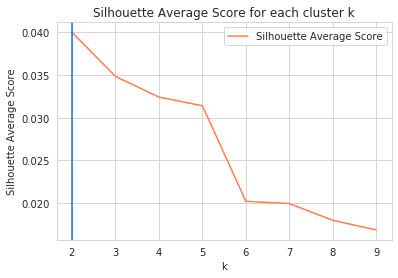

In [12]:
best_kmeans_silhouette(features=movies_reviews_embeddings, n_clusters=max_n_cluster)

## Best K model

In [0]:
best_k = 2

best_kmeans_labels = kmeans(k=best_k, features=np.array(movies_reviews_embeddings))

## PCA Visualize

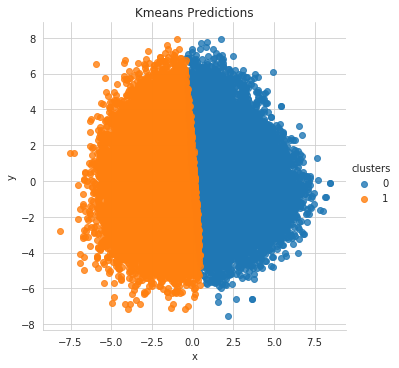

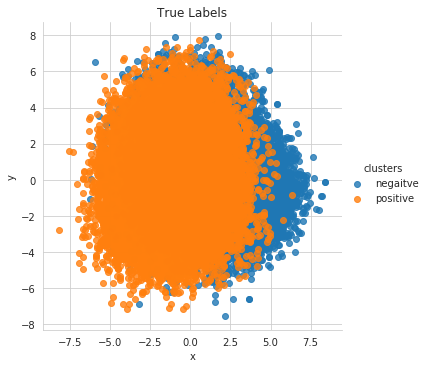



Found labels: [0, 1]



,labels,cluster_match
0,0,0:18333 1:5705
1,1,1:19295 0:6667


In [133]:
reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=best_kmeans_labels, 
                                 n_components=2, 
                                 label_decoder=None,
                                 title='Kmeans Predictions')
print('\n')
reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=sentiments_reviews, 
                                 n_components=2, 
                                 label_decoder=ID_SENTIMENT,
                                 title='True Labels')

print('\n')
matching_df = predictions_overlap(model_predicitons=best_kmeans_labels, 
                                  true_predicitons=sentiments_reviews)
matching_df.head()

# K Means Sentiments

## k=3 sentiments

In [0]:
k_sentiments = 3

### Fit kmeans

In [0]:
kmeans_labels = kmeans(k=k_sentiments, features=np.array(movies_reviews_embeddings))

### Find Labels

In [139]:
matching_df = predictions_overlap(model_predicitons=kmeans_labels, 
                                  true_predicitons=sentiments_reviews)
matching_df.head()

Found labels: [0, 1, 2]



,labels,cluster_match
0,0,1:7504 0:6536
1,1,1:14195 0:3846
2,2,0:14618 1:3301


### Visualize

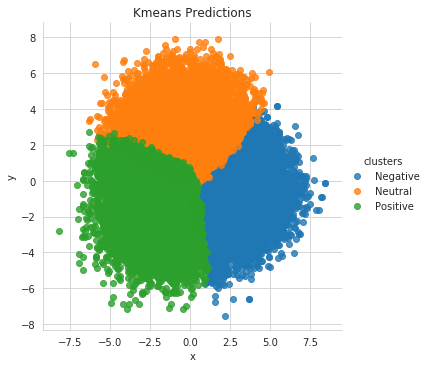

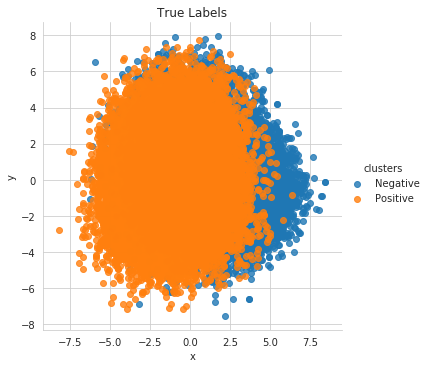

In [167]:
kmeans_id_sentiment = {0:'Neutral',
                        1:'Positive',
                        2:'Negative'}

reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=kmeans_labels, 
                                 n_components=2, 
                                 label_decoder=kmeans_id_sentiment,
                                 title='Kmeans Predictions')
print('\n')
reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=sentiments_reviews, 
                                 n_components=2, 
                                 label_decoder=ID_SENTIMENT,
                                 title='True Labels')


### Samples

In [176]:
show_samples(target_predicitons_class=0, 
              texts=movies_reviews,
             trues=sentiments_reviews, 
             trues_id_sentiment=ID_SENTIMENT,
              predicitons=kmeans_labels,
             predictions_id_sentiment=kmeans_id_sentiment,
              n_samples=3)

,Text,Label Sentiment,Prediction Sentiment
0,"Where to begin. This movie started out as something that seemed like a rip-off of ""Darkness Falls"". An old , disfigured woman living in the woods, giving kids presents for their teeth. Sound familiar? Then it changes. In ""Darkness Falls"", the tooth fairy only killed you if you saw her. The tooth fairy in this movie killed you no matter what. Why did they need the rocker, his hippie girlfriend or the Bubbas and their sister? I think the movie would've been fine without them. It seems like the producers sat around and decided that they needed to put extra people in the movie just so the tooth fairy would have people to kill. Although, it's nice to see a pretty blonde girl not being portrayed as a bubble-head for a change. Okay to rent, but I wouldn't suggest buying it.",Negative,Neutral
1,"""Toi le Venin"" is Robert Hossein's masterpiece,and one of the great thrillers of the fifties.Based on a Frederic Dard novel,a writer the director often worked with (see also ""le Monte-Charge"" which Hossein did not direct but in which he was the lead too),the screenplay grabs you from the first pictures on a desert road by night where a beautiful blonde might be the fieriest of the criminals to the mysterious house where he finds his femme fatale ..and her sister.Then begins a cat and mouse play .One of the sisters is in a wheelchair .But is she really disabled?Which one is the criminal who tried to kill the hero on that night? <br /><br />The two actresses,Marina Vlady and the late Odile Versois were sisters.<br /><br />Turn off all the lights before watching.Highly suspenseful.",Positive,Neutral
2,"I thought I had seen this movie, twice in fact. Then I read all the other reviews, and they didn't quite match up. A man and three young students, two girls and a boy, go to this town to study alleged bigfoot sightings. I still feel pretty confident that this is the movie I saw, despite the discrepancies in the reviews. Therefore I'm putting my review back: If you like the occasional 'B' movie, as I do, then Return to Boggy Creek is the movie for you! Whether it's setting the sleep timer, and nodding off to your favorite movie-bomb, or just hanging out with friends. Boggy Creek, the mute button, and you've got a fun night of improv. Look out! Is the legend true? I think we just might find out, along with a not-so-stellar cast. Will there be any equipment malfunctions at particularly key moments in the film? Does our blonde, manly, young hero have any chest hair? Will the exceptionally high-tech Technicolor last the entire film? You'll have to watch to find out for yourself.",Negative,Neutral


## k=4 sentiments

In [0]:
k_sentiments = 4

### Fit kmeans

In [0]:
kmeans_labels = kmeans(k=k_sentiments, features=np.array(movies_reviews_embeddings))

### Find Labels

In [179]:
matching_df = predictions_overlap(model_predicitons=kmeans_labels, 
                                  true_predicitons=sentiments_reviews)
matching_df.head()

Found labels: [0, 1, 2, 3]



,labels,cluster_match
0,0,1:5693 0:5155
1,1,1:10970 0:2816
2,2,0:12536 1:2294
3,3,1:6043 0:4493


### Visualize

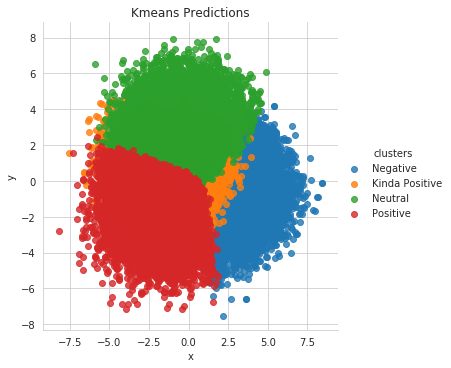

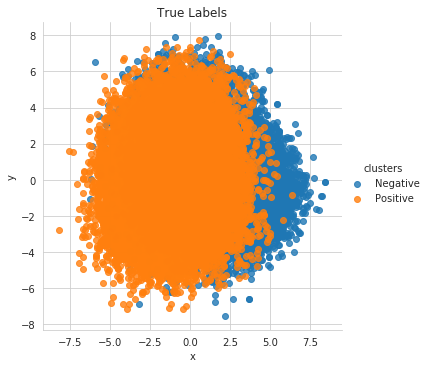

In [181]:
kmeans_id_sentiment = {0:'Neutral',
                        1:'Positive',
                        2:'Negative',
                       3:'Kinda Positive'}

reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=kmeans_labels, 
                                 n_components=2, 
                                 label_decoder=kmeans_id_sentiment,
                                 title='Kmeans Predictions')
print('\n')
reduced_features = pca_reduction(features=np.array(movies_reviews_embeddings), 
                                 labels_values=sentiments_reviews, 
                                 n_components=2, 
                                 label_decoder=ID_SENTIMENT,
                                 title='True Labels')


### Samples

In [184]:
print(kmeans_id_sentiment)
show_samples(target_predicitons_class=3, 
              texts=movies_reviews,
             trues=sentiments_reviews, 
             trues_id_sentiment=ID_SENTIMENT,
              predicitons=kmeans_labels,
             predictions_id_sentiment=kmeans_id_sentiment,
              n_samples=3)

{0: 'Neutral', 1: 'Positive', 2: 'Negative', 3: 'Kinda Positive'}


,Text,Label Sentiment,Prediction Sentiment
0,"this is the 1990's TV show,not the movie from 1979.it looks to be three episodes totaling just under 90 minutes.before watching,i thought it was one of the movie versions,and i noticed right away,it had a TV show Feel to it.i didn't care for it too much.i just felt the story wasn't there,and there wasn't much in the way of excitement or drama.i was looking at the time elapsed on my DVD player frequently,as i was really bored.i also thought some of the dialogue was,to put it politely,not good.plus, i thought the acting left a lot to be desired. but that's just me however,it is good clean,wholesome family entertainment.there's certainly nothing offensive here.kids will likely enjoy it.for me,The Black Stallion is 4/10",Negative,Kinda Positive
1,"It is no wonder this movie won 4 prices, it is a movie that lingers to any soul, it isn't a wonder why it took Paul Reiser 20 years to finally give in and talk to Peter Falk about his idea. I can understand every part of it, this is a movie that will make you cry just a tear, or thousands.<br /><br />Story: 10/10 When Sam kleinman gets a letter from his wife about her leaving him to find something else his son and him take out on a road trip to find her, and while they do that they find something lost, Friendship, family, and affection for each other. At the beginning you know whats going to happen, but none soever the story is not that easy to figure out from beginning to end, it is a ride between a father and his son, and a husband and his wife. It is no wonder it took Paul Reiser 20 years to write this beautiful romance/comedy.<br /><br />Actors: 10/10 Well you cant say anything else that what i about to say, hey it is with Peter Falk in it, he is a legend everything he does in movies are magic, when you use Peter Falk in a romance/comedy what do you think you get? A perfect outcome, it is no wonder this movie is that perfect and won that many prices. As the son Paul Reiser does an excellent job, although he isn't a great actor always that doesn't mean that this didn't work actually Peter Falk and Paul Reiser plays the perfect Father and Son, the rest of the cast is good enough but you don't see them as much so just say they do what they shall to get this to shine even more. <br /><br />Music: 10/10 It doesn't always work when using music sometimes it just doesn't fit but that is not the thing in this movie, the music is perfect in tune, it makes the movie even more compelling. This part of the movie will shine off as good as the other parts, a great soundtrack for a Romance/Comedy thats for sure.<br /><br />Overall: 10/10 There are so many Romance/Comedy movies out on tapes, DVDs, Blu-ray and what not, but this movie is one of the special ones. it doesn't happen everyday that you can create a story like this, it takes years thinking about this and the fact is that actually what it took to make it, a great piece that should be bought and kept into the human soul, see it when you get old and see it with your father at a old age, i think then this movie will spark like no other ever made.",Positive,Kinda Positive
2,"And I gave it a high 7.....<br /><br />Why? Because it bloody well rocked. At the time when there were so many OTHER shows on that were tied to toys/games this show was unique in that it had overlapping stories. As others have said here it was ahead of its time. <br /><br />Sadly this is why the show was doomed. They have released 4 DVDs with 16 episodes of the series so far. I am hoping that more come out. <br /><br />How does this compare watching it now 20 years after it first came out.. I don't know I still like it despite the sometimes clunky animation, and that IMHO is it's only flaw. The writing was almost top notch and way ahead of the competition........ <br /><br />I do hope for more DVDs or even a set of all the episodes in proper order... The DVDs are good but I don't think the stories are in their proper order, but d